In [ ]:
from src.resplit import resplit_dataset
from src.load_images import load_single_image,load_images_masks,load_single_mask
from src.plot import display_image_and_mask
from src.augment import augment_dataset
from src.model import unet_model,filter_pixels
from src.plot import plot_metrics
import matplotlib.pyplot as plt
import keras

In [3]:
data_path: str = "/home/recabet/.cache/kagglehub/datasets/atilol/aerialimageryforroofsegmentation/versions/9"
local_path: str = "/home/recabet/Coding/AerialSegmentation"

In [ ]:
resplit_dataset(data_path, local_path)

In [6]:
test_path: str = f"{local_path}/test"
train_path: str = f"{local_path}/train"
val_path: str = f"{local_path}/val"

In [7]:
train_images_path = f"{train_path}/images"
val_images_path = f"{val_path}/images"
test_images_path = f"{test_path}/images"
train_labels_path = f"{train_path}/labels"
val_labels_path = f"{val_path}/labels"
test_labels_path = f"{test_path}/labels"


In [10]:
image_10_path: str = f"{train_path}/images/christchurch_10.tif"
image_14_path: str = f"{train_path}/images/christchurch_14.tif"
image_42_path: str = f"{train_path}/images/christchurch_42.tif"
image_15_path: str = f"{train_path}/images/christchurch_15.tif"
image_17_path: str = f"{train_path}/images/christchurch_17.tif"
label_10_path: str = f"{train_path}/labels/christchurch_10_vis.tif"
label_14_path: str = f"{train_path}/labels/christchurch_14_vis.tif"
label_42_path: str = f"{train_path}/labels/christchurch_42_vis.tif"
label_15_path: str = f"{train_path}/labels/christchurch_15_vis.tif"
label_17_path: str = f"{train_path}/labels/christchurch_17_vis.tif"

In [11]:
image_10 = load_single_image(image_10_path)
image_14 = load_single_image(image_14_path)
image_42 = load_single_image(image_42_path)
image_15 = load_single_image(image_15_path)
image_17 = load_single_image(image_17_path)
mask_10 = load_single_mask(label_10_path)
mask_14 = load_single_mask(label_14_path)
mask_42 = load_single_mask(label_42_path)
mask_15 = load_single_mask(label_15_path)
mask_17 = load_single_mask(label_17_path)

c:\Users\babay\miniconda3\envs\tf\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


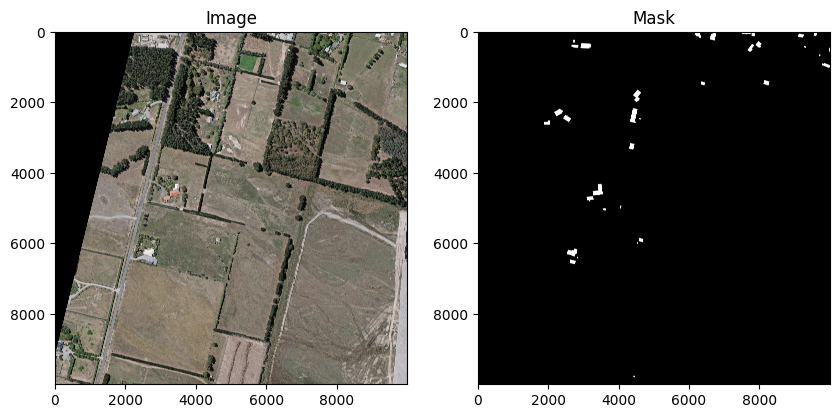

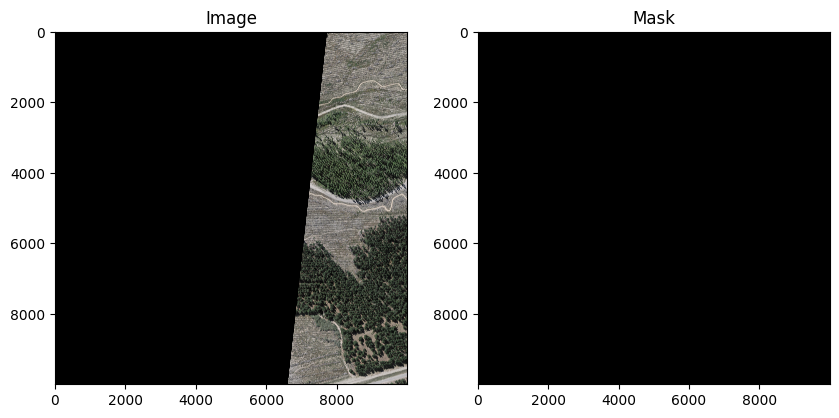

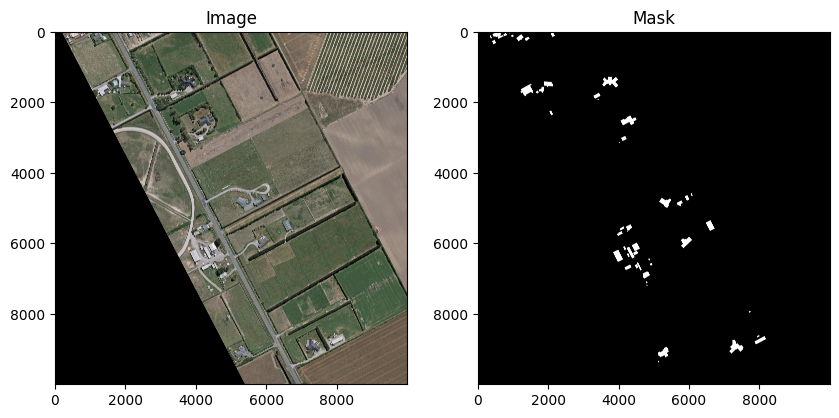

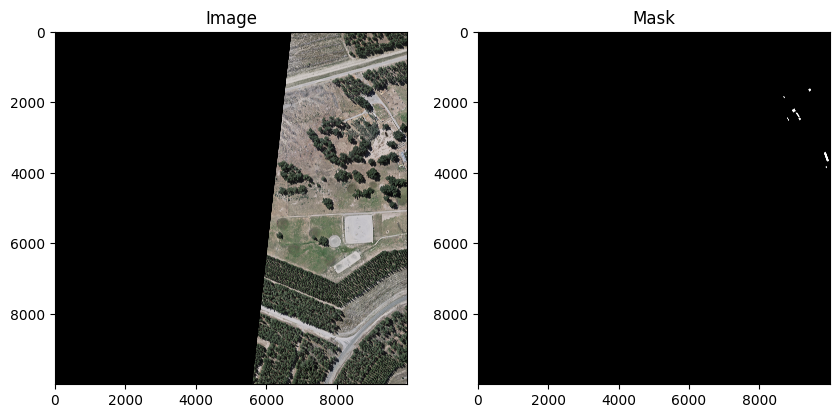

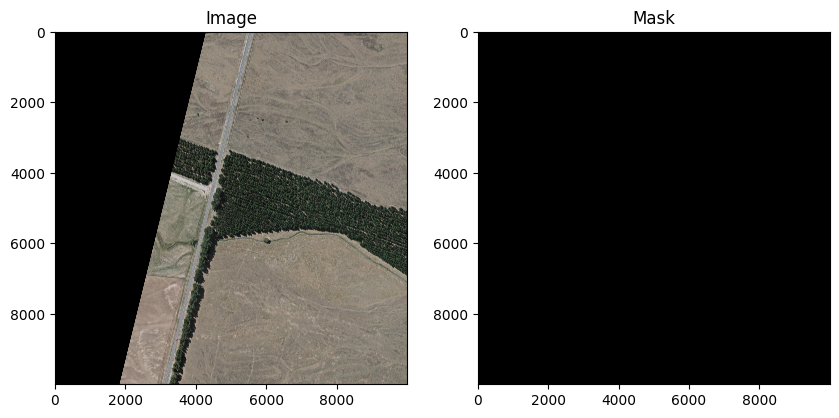

In [13]:
display_image_and_mask(image_10, mask_10)
display_image_and_mask(image_14, mask_14)
display_image_and_mask(image_42, mask_42)
display_image_and_mask(image_15, mask_15)
display_image_and_mask(image_17, mask_17)

In [10]:
train_images, train_labels = load_images_masks(train_images_path, train_labels_path, img_size=(256, 256),remove_black_masks=True)
val_images, val_labels = load_images_masks(val_images_path, val_labels_path, img_size=(256, 256))
test_images, test_labels = load_images_masks(test_images_path, test_labels_path, img_size=(256, 256))

In [16]:
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)
print("Validation Images Shape:", val_images.shape)
print("Validation Labels Shape:", val_labels.shape)

Train Images Shape: (603, 128, 128, 3)
Train Labels Shape: (603, 128, 128, 1)
Test Images Shape: (105, 128, 128, 3)
Test Labels Shape: (105, 128, 128, 1)
Validation Images Shape: (209, 128, 128, 3)
Validation Labels Shape: (209, 128, 128, 1)


In [19]:
generated_train= augment_dataset(train_images, train_labels)
generated_val = augment_dataset(val_images, val_labels)

In [20]:
for images, labels in generated_train.take(1):
    print(f"Image batch shape: {images.shape}")
    print(f"Mask batch shape: {labels.shape}")
    break

Image batch shape: (4, 128, 128, 3)
Mask batch shape: (4, 128, 128, 1)


In [21]:
callbacks = [
    keras.callbacks.ModelCheckpoint("models/with_aug_model.keras",
                                    save_best_only=True,
                                    monitor="val_loss"),

    keras.callbacks.EarlyStopping(monitor="val_loss",
                                  patience=10,
                                  restore_best_weights=True),

    keras.callbacks.ReduceLROnPlateau(monitor=
                                      "val_loss",
                                      factor=0.2,
                                      patience=5,
                                      verbose=1),
]


model = unet_model((128, 128, 3))

history = model.fit(
    generated_train,
    batch_size=1,
    epochs=10,
    validation_data = generated_val,
    callbacks=callbacks
)


Epoch 1/10
302/302 [==============================] - 52s 131ms/step - loss: 0.3159 - accuracy: 0.9079 - binary_io_u: 0.4553 - precision: 0.0937 - recall: 3.3527e-05 - val_loss: 0.1933 - val_accuracy: 0.9176 - val_binary_io_u: 0.4600 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/10
302/302 [==============================] - 37s 121ms/step - loss: 0.2082 - accuracy: 0.9103 - binary_io_u: 0.5004 - precision: 0.5856 - recall: 0.0939 - val_loss: 0.1795 - val_accuracy: 0.9225 - val_binary_io_u: 0.5459 - val_precision: 0.6003 - val_recall: 0.1892 - lr: 0.0010
Epoch 3/10
302/302 [==============================] - 37s 121ms/step - loss: 0.1900 - accuracy: 0.9172 - binary_io_u: 0.5711 - precision: 0.6288 - recall: 0.2575 - val_loss: 0.1632 - val_accuracy: 0.9280 - val_binary_io_u: 0.5453 - val_precision: 0.8165 - val_recall: 0.1649 - lr: 0.0010
Epoch 4/10
302/302 [==============================] - 37s 121ms/step - loss: 0.1807 - accuracy: 0.9218 - binary_io_u: 0.6029

In [12]:
model = keras.models.load_model("models/data_augmented_model.keras")

In [13]:
predictions=model.predict(test_images)

4/4 [==============================] - 21s 1s/step


In [24]:
precision = history.history.get('precision', [])
recall = history.history.get('recall', [])
accuracy = history.history.get('accuracy', [])
iou = history.history.get('binary_io_u', [])
loss=history.history.get('loss', [])
val_precision = history.history.get('val_precision', [])
val_recall = history.history.get('val_recall', [])
val_accuracy = history.history.get('val_accuracy', [])
val_iou = history.history.get('val_binary_io_u', [])
val_loss=history.history.get('val_loss', [])

f1 = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision, recall)]
val_f1 = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(val_precision, val_recall)]


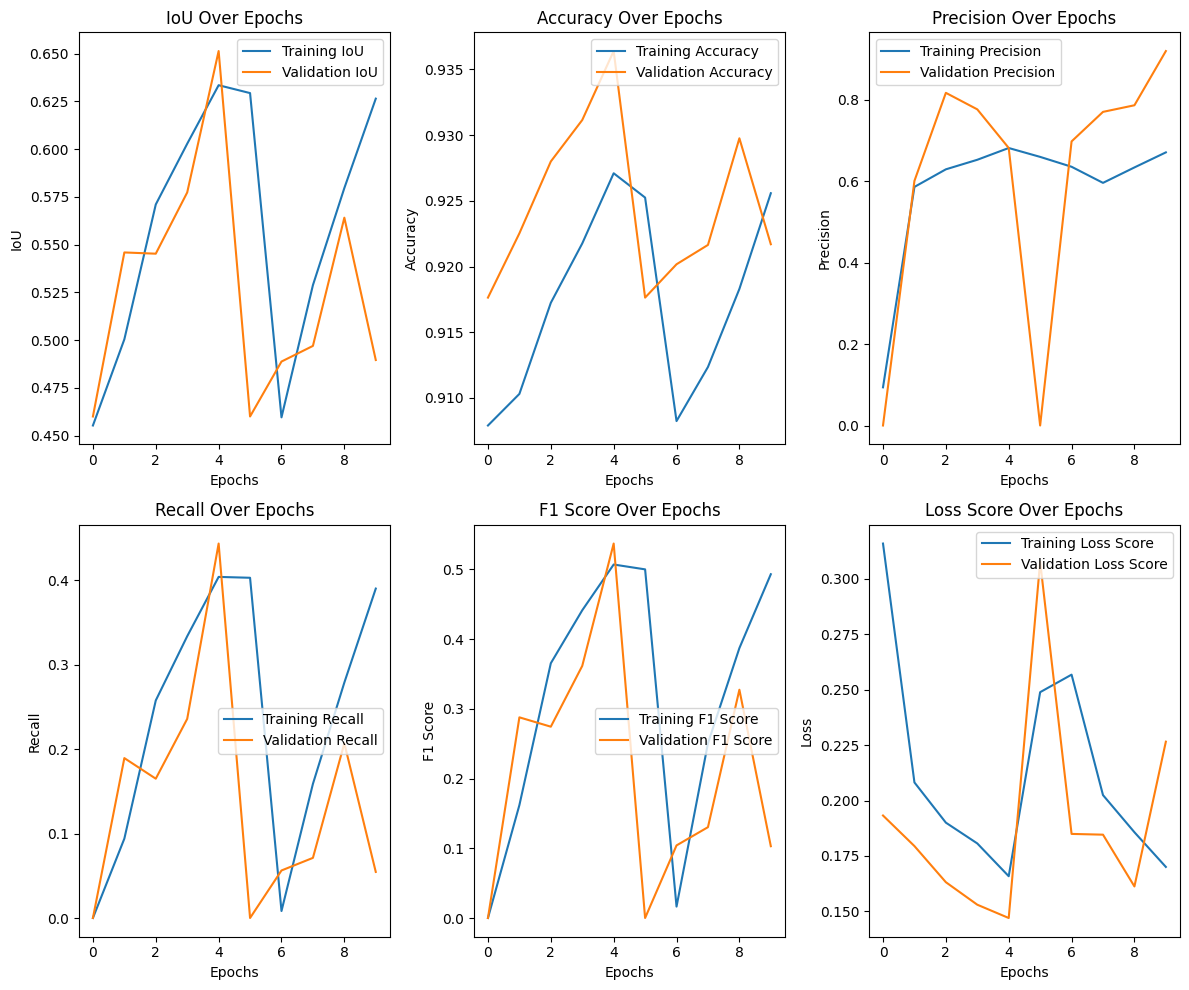

In [25]:
plot_metrics(iou,
             val_iou,
             accuracy,
             val_accuracy,
             precision,
             val_precision,
             recall,
             val_recall,
             f1,
             val_f1,
             loss,
             val_loss)

In [ ]:
threshold = 0.6
filter_pixels(threshold,predictions)

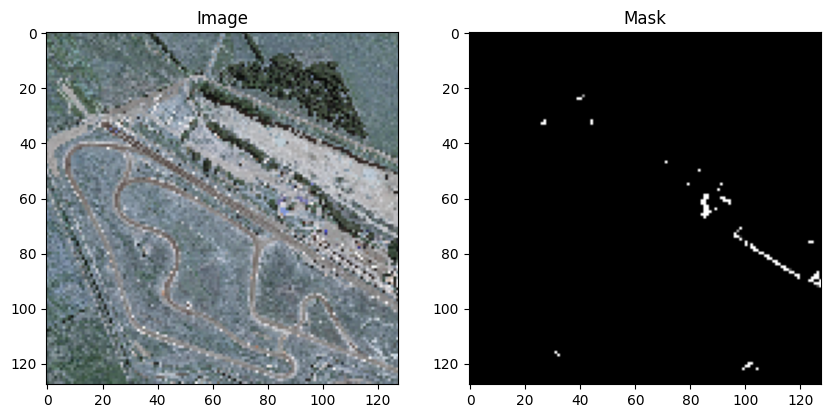

Text(0.5, 1.0, 'Model Prediction')

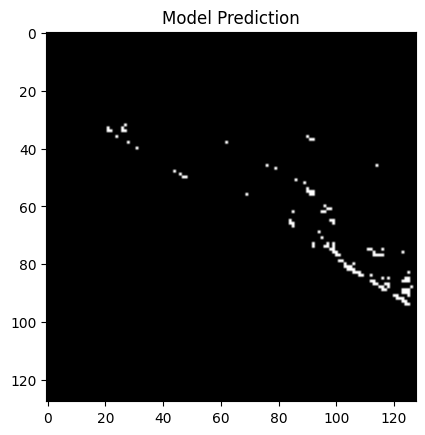

In [53]:
display_image_and_mask(test_images[0],test_labels[0])
plt.imshow(predictions[0],cmap='gray')
plt.title('Model Prediction')

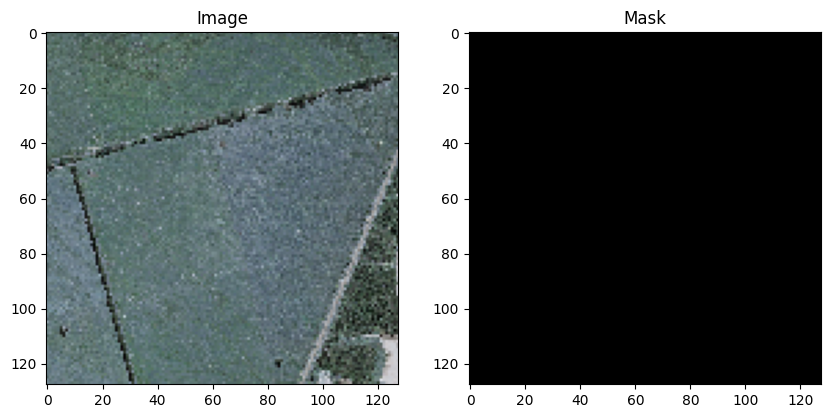

Text(0.5, 1.0, 'Model Prediction')

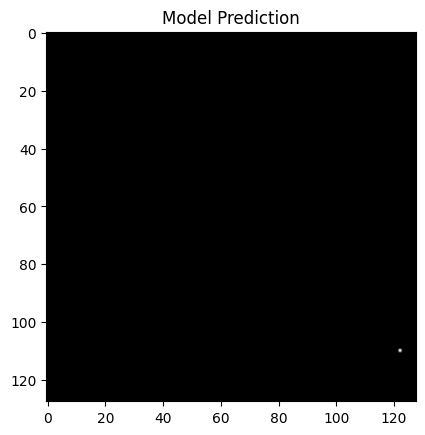

In [48]:
display_image_and_mask(test_images[1],test_labels[1])
plt.imshow(predictions[1],cmap='gray')
plt.title('Model Prediction')

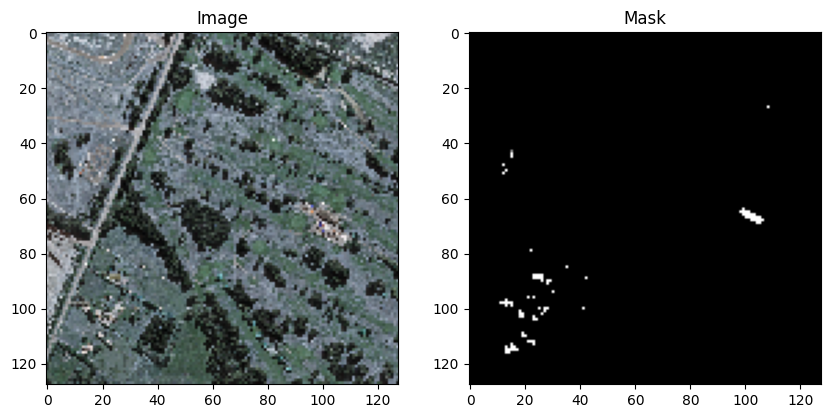

Text(0.5, 1.0, 'Model Prediction')

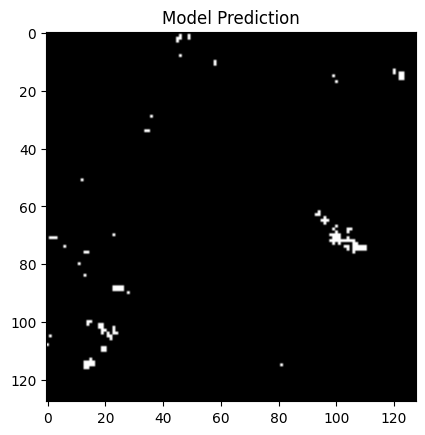

In [49]:
display_image_and_mask(test_images[2],test_labels[2])
plt.imshow(predictions[2],cmap='gray')
plt.title('Model Prediction')

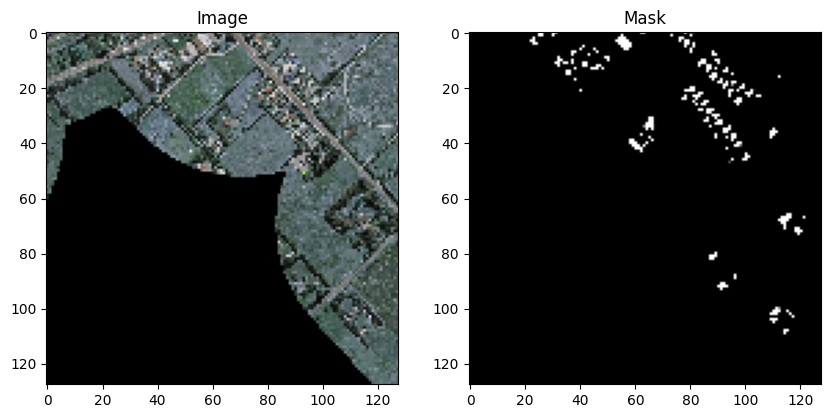

Text(0.5, 1.0, 'Model Prediction')

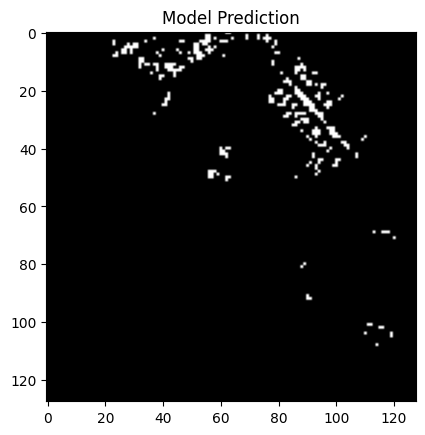

In [50]:
display_image_and_mask(test_images[3],test_labels[3])
plt.imshow(predictions[3],cmap='gray')
plt.title('Model Prediction')

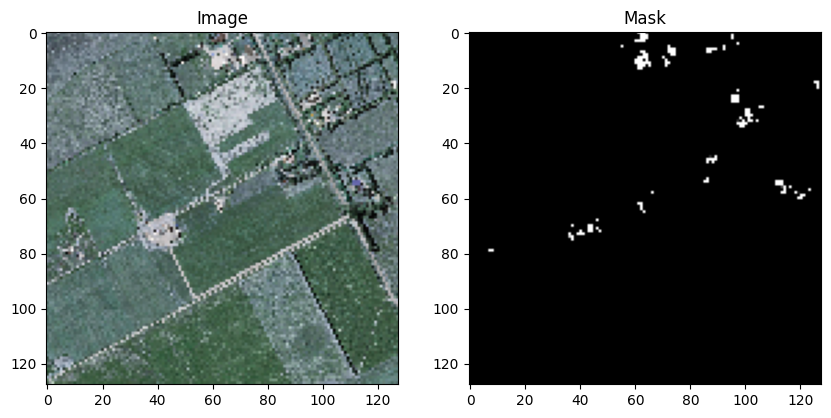

Text(0.5, 1.0, 'Model Prediction')

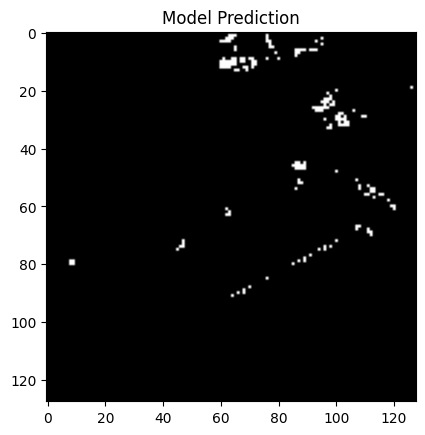

In [51]:
display_image_and_mask(test_images[4],test_labels[4])
plt.imshow(predictions[4],cmap='gray')
plt.title('Model Prediction')

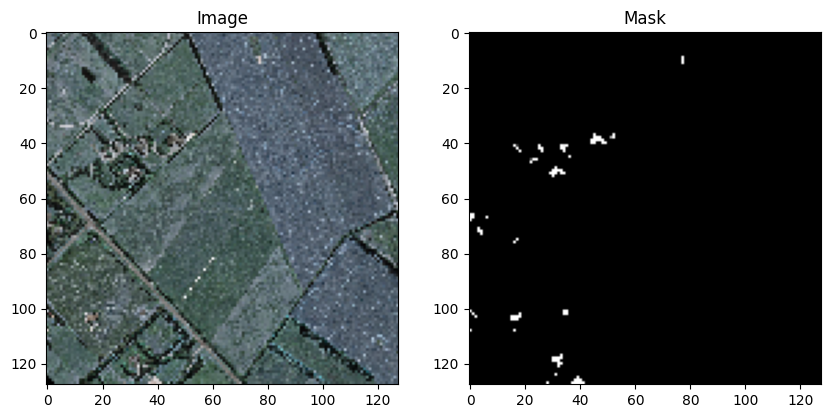

Text(0.5, 1.0, 'Model Prediction')

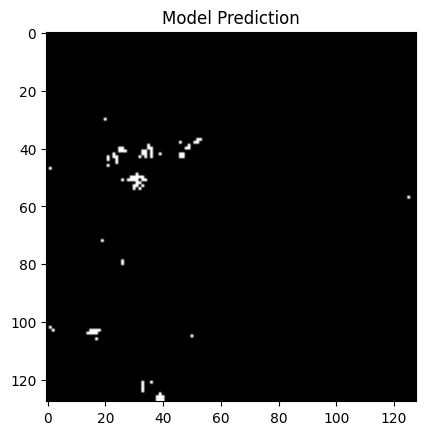

In [44]:
display_image_and_mask(test_images[5],test_labels[5])
plt.imshow(predictions[5],cmap='gray')
plt.title('Model Prediction')